In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import nibabel as nib
import seaborn as sns

In [2]:
# https://github.com/rubyshamir/cDC/blob/main/continuous_Dice_coefficient.py
def cdc(A_binary, B_probability_map):

    AB = A_binary * B_probability_map
    c = np.sum(AB)/max(np.size(AB[AB>0]), 1)
    cDC = 2*(np.sum(AB))/(c*np.sum(A_binary) + np.sum(B_probability_map))

    return cDC

def dice(A_binary, B_binary):

    AB = A_binary * B_binary
    DC = 2*(np.sum(AB))/(np.sum(A_binary) + np.sum(B_binary))

    return DC

In [3]:
df=[]

In [4]:
path_database  = '/mnt/d/crmbm/data_sep_3T/'

for sujet_index in range (41):
    lesion_non_bin = nib.load(path_database + 'sub' + str(sujet_index).zfill(2) +'/UNI_crop_predMean.nii.gz')
    lesion_non_bin = np.array(lesion_non_bin.get_fdata())
    ret,lesion_bin = cv2.threshold(lesion_non_bin,0.2,1,cv2.THRESH_BINARY)
    gt_lesion= nib.load(path_database +'sub' + str(sujet_index).zfill(2) +'/' + str(sujet_index).zfill(2) +'lesion_GT_crop.nii.gz')
    gt_lesion = np.array(gt_lesion.get_fdata())
    
    dice_lesion = dice(gt_lesion, lesion_bin)
    c_dice = cdc(gt_lesion, lesion_non_bin)
    d = {'subject': sujet_index, 'dice_lesion':dice_lesion,'c_dice':c_dice}
    df.append(d)
data=pd.DataFrame(data=df)
data

,subject,dice_lesion,c_dice
0,0,0.312108,0.451704
1,1,0.326052,0.391168
2,2,0.528048,0.637360
3,3,0.000000,0.000000
4,4,0.000000,0.000000
5,5,0.278228,0.405939
6,6,0.137237,0.280253
7,7,0.442199,0.617210
8,8,0.000000,0.000000
9,9,0.359691,0.521173


In [ ]:
data.to_csv(path_database + '/dice_c_dice.csv')

In [5]:
df1 = pd.read_excel(path_database + '/dice_c_dice.xlsx')
df1

,Type,subject,dice
0,Classic,0,0.312108
1,Classic,1,0.326052
2,Classic,2,0.528048
3,Classic,3,0.000000
4,Classic,4,0.000000
...,...,...,...
77,Dice continuous,36,0.341370
78,Dice continuous,37,0.000000
79,Dice continuous,38,0.000000
80,Dice continuous,39,0.415623


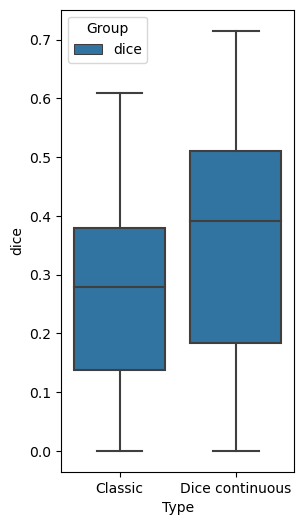

In [6]:
df_dsc = df1.filter(['dice','Type'], axis=1)
df_ds.insert(0, 'Group', 'dice')
df_dsc_gm.rename(columns={'elastix': 'Dice'}, inplace=True)


frames = [df_dsc_gm]
result_gm = pd.concat(frames, axis=0)

plt.figure(figsize=(3,6))
ax_gm = sns.boxplot(data=result_gm, x="Type", y="dice", hue="Group",notch=False)